In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/PFE/PFE

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/PFE/PFE


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from prep_dataset import *
from models.GCN_model import *
from models.GIN_model import *
from train import *

In [0]:
# Setting up the default Data Type
use_cuda = torch.cuda.is_available()
FloatTensor = torch.cuda.FloatTensor if use_cuda else torch.FloatTensor
device = torch.device('cuda') if use_cuda else torch.device('cpu')
dtype = torch.float32
torch.set_default_tensor_type(FloatTensor)

In [0]:
train_percentage = 0.8
batch_size = 32
ds_name = "PTC_MR"                   

train_loader, valid_loader, info = prep_dataset(ds_name, train_percentage, batch_size)


In [0]:
learning_rate = 0.0001
num_epochs = 1000
n_features = info[0]
hidden_dim = 10
n_classes = info[1]
dropout = 0  
n_gnn_layers = 6 
n_mlp_layers = 6

In [6]:
model = GIN(n_gnn_layers, n_mlp_layers, input_dim=n_features, hidden_dim=hidden_dim, 
            output_dim=n_classes, learn_eps=False, dropout=dropout, attention=False)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_log = train_GNN(model, train_loader, optimizer, criterion, num_epochs=num_epochs, device=device)

Epoch [1/1000], Loss: 3.0048
Epoch [2/1000], Loss: 3.0195
Epoch [3/1000], Loss: 3.0037
Epoch [4/1000], Loss: 2.9910
Epoch [5/1000], Loss: 2.9649
Epoch [6/1000], Loss: 2.9114
Epoch [7/1000], Loss: 2.9126
Epoch [8/1000], Loss: 2.9153
Epoch [9/1000], Loss: 2.9282
Epoch [10/1000], Loss: 2.8987
Epoch [11/1000], Loss: 2.9037
Epoch [12/1000], Loss: 2.8739
Epoch [13/1000], Loss: 2.8615
Epoch [14/1000], Loss: 2.7823
Epoch [15/1000], Loss: 2.7951
Epoch [16/1000], Loss: 2.7448
Epoch [17/1000], Loss: 2.7608
Epoch [18/1000], Loss: 2.7387
Epoch [19/1000], Loss: 2.7262
Epoch [20/1000], Loss: 2.6832
Epoch [21/1000], Loss: 2.6397
Epoch [22/1000], Loss: 2.6053
Epoch [23/1000], Loss: 2.6299
Epoch [24/1000], Loss: 2.5621
Epoch [25/1000], Loss: 2.6334
Epoch [26/1000], Loss: 2.5736
Epoch [27/1000], Loss: 2.6002
Epoch [28/1000], Loss: 2.4930
Epoch [29/1000], Loss: 2.4938
Epoch [30/1000], Loss: 2.4540
Epoch [31/1000], Loss: 2.5546
Epoch [32/1000], Loss: 2.4579
Epoch [33/1000], Loss: 2.3973
Epoch [34/1000], Lo

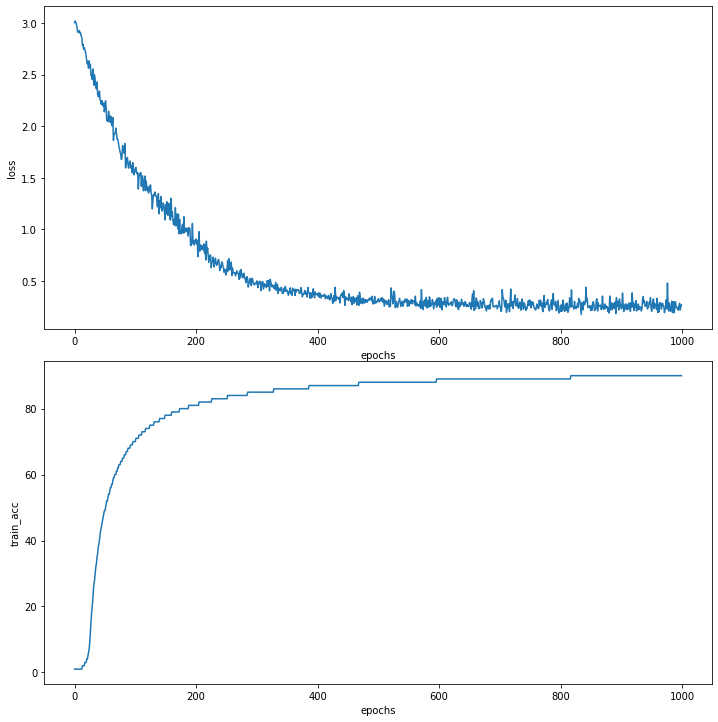

In [7]:
plot_learning_curves(train_log)